In [2]:
%matplotlib inline

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import datetime

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,median_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
import random

from sklearn.linear_model import LinearRegression

In [56]:
## Load the data into a DataFrame
stores_all=pd.read_csv('Data/Iowa_cleanHeaders.csv')
stores_all.head(10)

,Unnamed: 0,Unnamed,index,Invoice_Item_Number,Date,Store_Number,Store_Name,Address,City,Zip_Code,...,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Iowa_ZIP_Code_Tabulation_Areas,Iowa_Watershed_Sub-Basins_HUC_08,Iowa_Watersheds_HUC_10,County_Boundaries_of_Iowa,US_Counties
0,0,0,284394,INV-14210900001,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,...,2.70,48,129.60,18.00,4.75,87.0,29.0,342.0,64.0,1878.0
1,1,1,1367141,INV-14210900002,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,...,7.05,6,42.30,3.00,0.79,87.0,29.0,342.0,64.0,1878.0
2,2,2,4766887,INV-14210900003,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,...,23.36,4,93.44,3.00,0.79,87.0,29.0,342.0,64.0,1878.0
3,3,3,5505505,INV-17983700005,2019-03-07,5425,Spirits Liquor,109 E 1st St. # B,Grimes,50111.0,...,45.00,1,45.00,3.50,0.92,NaN,NaN,NaN,NaN,NaN
4,4,4,5505506,INV-17956400075,2019-03-06,2500,Hy-Vee Food Store #1 / Ames,3800 W Lincoln Way,Ames,50010.0,...,18.75,4,75.00,3.00,0.79,NaN,NaN,NaN,NaN,NaN
5,5,5,5505507,INV-18453000022,2019-03-29,2445,Ruback's Food Center,504 South Highway,Oakland,51560.0,...,14.25,2,28.50,2.00,0.52,NaN,NaN,NaN,NaN,NaN
6,6,6,5505508,INV-18030300035,2019-03-11,2528,Hy-Vee Food Store #3 / Des Moines,3221 SE 14th St,Des Moines,50315.0,...,18.75,12,225.00,9.00,2.37,NaN,NaN,NaN,NaN,NaN
7,7,7,5505509,INV-17934800043,2019-03-05,3705,Liquor Locker,507 1st Ave #100,Rock Rapids,51246.0,...,12.39,2,24.78,1.50,0.39,NaN,NaN,NaN,NaN,NaN
8,8,8,5505510,INV-18062400027,2019-03-11,2459,Reinhart Foods,200 State Po Box 98,Guthrie Center,50115.0,...,15.00,1,15.00,1.75,0.46,NaN,NaN,NaN,NaN,NaN
9,9,9,5505511,INV-18032400010,2019-03-11,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,...,5.25,24,126.00,9.00,2.37,NaN,NaN,NaN,NaN,NaN


In [57]:
 stores_all["Date"] = pd.to_datetime(stores_all["Date"])

In [58]:
def DataInspect(dataframe):
    print("Dataframe Shape:", dataframe.shape,"\n")
    print("Duplicate Rows:", dataframe.duplicated().sum(),"\n") #Added this
    print("Dataframe Types \n\n", dataframe.dtypes,"\n")    
    print("Missing Values \n\n", dataframe.isnull().sum(),"\n")
    print("Dataframe Describe \n\n", dataframe.describe(include='all'),"\n")


    print('Unique Values by Variable')
    for item in dataframe:
        print(item,':',dataframe[item].nunique())

In [7]:
DataInspect(stores_all)

Dataframe Shape: (3671454, 32) 

Duplicate Rows: 0 

Dataframe Types 

 Unnamed: 0                                   int64
Unnamed                                      int64
index                                        int64
Invoice_Item_Number                         object
Date                                datetime64[ns]
Store_Number                                 int64
Store_Name                                  object
Address                                     object
City                                        object
Zip_Code                                   float64
Store_Location                              object
County_Number                              float64
County                                      object
Category                                   float64
Category_Name                               object
Vendor_Number                              float64
Vendor_Name                                 object
Item_Number                                  int64
Item_Descr

In [8]:
stores_all.head()

,Unnamed: 0,Unnamed,index,Invoice_Item_Number,Date,Store_Number,Store_Name,Address,City,Zip_Code,...,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons,Iowa_ZIP_Code_Tabulation_Areas,Iowa_Watershed_Sub-Basins_HUC_08,Iowa_Watersheds_HUC_10,County_Boundaries_of_Iowa,US_Counties
0,0,0,284394,INV-14210900001,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,...,2.70,48,129.60,18.0,4.75,87.0,29.0,342.0,64.0,1878.0
1,1,1,1367141,INV-14210900002,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,...,7.05,6,42.30,3.0,0.79,87.0,29.0,342.0,64.0,1878.0
2,2,2,4766887,INV-14210900003,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,...,23.36,4,93.44,3.0,0.79,87.0,29.0,342.0,64.0,1878.0
3,3,3,5505505,INV-17983700005,2019-03-07,5425,Spirits Liquor,109 E 1st St. # B,Grimes,50111.0,...,45.00,1,45.00,3.5,0.92,NaN,NaN,NaN,NaN,NaN
4,4,4,5505506,INV-17956400075,2019-03-06,2500,Hy-Vee Food Store #1 / Ames,3800 W Lincoln Way,Ames,50010.0,...,18.75,4,75.00,3.0,0.79,NaN,NaN,NaN,NaN,NaN


In [9]:
#let's try to drop all the duplicate
Stores_iowa =  stores_all.drop(stores_all[stores_all.duplicated()].index,axis=0)


In [10]:
Stores_iowa.shape

(3671454, 32)

In [11]:
#let's drop rows that we don't need
Stores_iowa.drop(['Unnamed: 0','Unnamed'],axis=1,inplace=True)
Stores_iowa.shape

(3671454, 30)

In [12]:
Stores_iowa.columns

Index(['index', 'Invoice_Item_Number', 'Date', 'Store_Number', 'Store_Name',
       'Address', 'City', 'Zip_Code', 'Store_Location', 'County_Number',
       'County', 'Category', 'Category_Name', 'Vendor_Number', 'Vendor_Name',
       'Item_Number', 'Item_Description', 'Pack', 'Bottle _volume_ml',
       'State_Bottle_Cost', 'State_Bottle_Retail', 'Bottles_Sold',
       'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons',
       'Iowa_ZIP_Code_Tabulation_Areas', 'Iowa_Watershed_Sub-Basins_HUC_08',
       'Iowa_Watersheds_HUC_10', 'County_Boundaries_of_Iowa', 'US_Counties'],
      dtype='object')

In [13]:
Stores_iowa.drop(['Iowa_ZIP_Code_Tabulation_Areas', 'Iowa_Watershed_Sub-Basins_HUC_08',
       'Iowa_Watersheds_HUC_10', 'County_Boundaries_of_Iowa', 'US_Counties'],axis=1,inplace=True)
Stores_iowa.shape

(3671454, 25)

In [14]:
#Let's see how the counties if we remove duplicates data in counties and drop all duplicates

# counties_iowa = Stores_iowa[Stores_iowa[['city','Zip_Code','County_Number','county']].duplicated()==False][['city','Zip_Code', 'County_Number','county']]

counties_iowa = Stores_iowa[Stores_iowa['County_Number'].notnull() & Stores_iowa['County'].notnull()]
counties_iowa['County'].nunique()

131

In [15]:
#drop all null values irregardless of columns
counties_iowa.dropna()
counties_iowa.head()

,index,Invoice_Item_Number,Date,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,...,Item_Number,Item_Description,Pack,Bottle _volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
0,284394,INV-14210900001,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,...,36904,Mccormick Vodka Pet,24,375,1.80,2.70,48,129.60,18.0,4.75
1,1367141,INV-14210900002,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,...,36901,McCormick Vodka Mini,6,500,4.70,7.05,6,42.30,3.0,0.79
2,4766887,INV-14210900003,2018-09-04,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,...,26826,Jack Daniels Old #7 Black Lbl,12,750,15.57,23.36,4,93.44,3.0,0.79
3,5505505,INV-17983700005,2019-03-07,5425,Spirits Liquor,109 E 1st St. # B,Grimes,50111.0,NaN,77.0,...,100015,Fireball Bag in Box,3,3500,30.00,45.00,1,45.00,3.5,0.92
4,5505506,INV-17956400075,2019-03-06,2500,Hy-Vee Food Store #1 / Ames,3800 W Lincoln Way,Ames,50010.0,NaN,85.0,...,34456,Ketel One,12,750,12.50,18.75,4,75.00,3.0,0.79


In [16]:
counties_iowa.shape

(3669171, 25)

#PREDICTING 2019 SALES BASED ON 2018

In [17]:
#Let's separate the data to see how many data each year has

iowa_2019 = counties_iowa[counties_iowa['Date'] > '2018-12-31']
print(iowa_2019.shape)

# we'll try to isolate 2018 data from 2019 in order for us to train the datatraining data
iowa_2018 = counties_iowa[counties_iowa['Date'] < '2019-01-01']
print(iowa_2018.shape)

print(iowa_2018.shape[0] + iowa_2018.shape[0])

(1315308, 25)
(2353863, 25)
4707726


In [18]:
# print(iowa_2019['Date'].describe())
# print('')
# # print(iowa_2018['Date'].describe())

In [19]:
iowa_2019.columns

Index(['index', 'Invoice_Item_Number', 'Date', 'Store_Number', 'Store_Name',
       'Address', 'City', 'Zip_Code', 'Store_Location', 'County_Number',
       'County', 'Category', 'Category_Name', 'Vendor_Number', 'Vendor_Name',
       'Item_Number', 'Item_Description', 'Pack', 'Bottle _volume_ml',
       'State_Bottle_Cost', 'State_Bottle_Retail', 'Bottles_Sold',
       'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons'],
      dtype='object')

LET'S PLAY AND SEE HOW HEACH STORE PERFORMED IN 2018

In [20]:
#Sales DONE BY STORE
store_location_2018 = iowa_2018.groupby('Store_Number')[['Bottle _volume_ml','State_Bottle_Cost','State_Bottle_Retail', 'Bottles_Sold',
                                                'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons']].sum()
store_location_2018.head()

,Bottle _volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
Store_Number,,,,,,,
2106,4226520,51737.90,77617.44,93410,1337244.94,87658.57,23152.33
2113,1577000,17992.37,26992.84,5645,80578.24,5647.12,1488.04
2130,3518070,42474.49,63720.64,74820,1184941.20,68643.59,18130.14
2178,2392225,24864.82,37302.83,21389,311540.25,23205.70,6124.66
2190,10809570,183014.55,274551.71,120527,1755604.23,76696.71,20231.29


In [21]:
# Let's see the sales of alchol based on county
county_location_2018= iowa_2018.groupby('County')[['Bottle _volume_ml','State_Bottle_Cost','State_Bottle_Retail', 'Bottles_Sold',
                                                'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons']].sum()
county_location_2018.head()

,Bottle _volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
County,,,,,,,
ADAIR,2241325,21267.20,31905.68,18578,235301.43,17492.72,4615.26
ADAMS,1446400,14893.81,22343.74,3881,57235.57,4081.16,1074.90
ALLAMAKEE,9847510,96174.52,144282.95,63550,882149.45,69171.11,18250.44
APPANOOSE,7389300,77790.33,116702.46,68370,896239.71,62827.76,16580.81
AUDUBON,2712775,24920.94,37387.38,16071,183616.27,14683.96,3870.64


In [22]:
#checking to see how many location has sales less than 5000,000
county_location_2018[(county_location_2018['Sale_Dollars'] < 500000)].sort_values('Sale_Dollars',ascending=False).count()

Bottle _volume_ml      47
State_Bottle_Cost      47
State_Bottle_Retail    47
Bottles_Sold           47
Sale_Dollars           47
Volume_Sold_Liters     47
Volume_Sold_Gallons    47
dtype: int64

Let's group and aggregat the sales based

In [23]:
# WE WILL CHANGE THE WAY THE DATE APPEARS AND ONLY SHOW THE DATE AS A MONTH

monthly_2018 = iowa_2018.groupby([iowa_2018['Date'].dt.strftime('%B'),'Store_Number'])[['Bottle _volume_ml','State_Bottle_Cost','State_Bottle_Retail', 'Bottles_Sold',
                                            'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons']].sum().reset_index()
monthly_2018.head()

,Date,Store_Number,Bottle _volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
0,April,2106,345950,4117.15,6176.61,7726,110242.90,7261.35,1918.56
1,April,2113,118125,1444.62,2167.30,447,6845.47,438.86,115.93
2,April,2130,286100,3595.96,5394.66,5677,91978.05,5214.74,1377.75
3,April,2178,160800,1619.63,2429.82,1188,16218.52,1183.74,312.72
4,April,2190,959050,17019.15,25531.52,12516,157892.09,7035.54,1859.81


In [24]:
# Now that we have the date changed only into month, I want to compare how the sales of ml did compare to the gallons
volume_sold_2018 = monthly_2018.pivot(index='Store_Number',columns='Date')
volume_sold_2018.columns
volume_sold_2018.head()

Bottle _volume_ml                                           \
Date                     April    August   December  February   January   
Store_Number                                                              
2106                  345950.0  409025.0   353050.0  307675.0  301200.0   
2113                  118125.0   88500.0   133000.0  109625.0  150500.0   
2130                  286100.0  384600.0   292450.0  269900.0  289400.0   
2178                  160800.0  238625.0   249775.0  160775.0  153800.0   
2190                  959050.0  939025.0  1049200.0  695825.0  720900.0   

                                                                 ...  \
Date              July      June     March       May   November  ...   
Store_Number                                                     ...   
2106          291300.0  316300.0  429425.0  454895.0   357975.0  ...   
2113          119375.0  136125.0  165875.0  173125.0   123125.0  ...   
2130          246100.0  246850.0  341550.0  347045.0   263250.0  ...   
2178          181450.0  214475.0  234250.0  165075.0   269950.0  ...   
2190          913100.0  853000.0  874650.0  914295.0  1083650.0  ...   

             Volume_Sold_Gallons                                               \
Date                    December February  January     July     June    March   
Store_Number                                                                    
2106                     2041.92  1690.20  1729.64  1485.55  1591.11  2350.94   
2113                      127.94   104.81   132.43   116.71   147.22   144.98   
2130                     1648.73  1438.16  1350.14  1241.23  1285.65  1925.83   
2178                      716.87   429.58   318.34   330.06   461.28   548.82   
2190                     2113.22  1330.41  1379.23  1915.75  1662.73  1718.02   

                                                   
Date              May November  October September  
Store_Number                                       
2106          2440.52  1890.76  1934.64   1703.15  
2113           154.20   101.54   136.65    121.24  
2130          1809.49  1456.56  1437.21   1316.54  
2178           807.79   605.14   752.47    334.86  
2190          1653.57  1812.19  1652.06   1548.05  

[5 rows x 84 columns]

In [25]:
# now that we have all the dataset grouped based on the alcohol volume, lets disolved them based on month and store
stores_area_sales = pd.DataFrame(volume_sold_2018.to_records())
stores_area_sales.head()

,Store_Number,"('Bottle _volume_ml', 'April')","('Bottle _volume_ml', 'August')","('Bottle _volume_ml', 'December')","('Bottle _volume_ml', 'February')","('Bottle _volume_ml', 'January')","('Bottle _volume_ml', 'July')","('Bottle _volume_ml', 'June')","('Bottle _volume_ml', 'March')","('Bottle _volume_ml', 'May')",...,"('Volume_Sold_Gallons', 'December')","('Volume_Sold_Gallons', 'February')","('Volume_Sold_Gallons', 'January')","('Volume_Sold_Gallons', 'July')","('Volume_Sold_Gallons', 'June')","('Volume_Sold_Gallons', 'March')","('Volume_Sold_Gallons', 'May')","('Volume_Sold_Gallons', 'November')","('Volume_Sold_Gallons', 'October')","('Volume_Sold_Gallons', 'September')"
0,2106,345950.0,409025.0,353050.0,307675.0,301200.0,291300.0,316300.0,429425.0,454895.0,...,2041.92,1690.20,1729.64,1485.55,1591.11,2350.94,2440.52,1890.76,1934.64,1703.15
1,2113,118125.0,88500.0,133000.0,109625.0,150500.0,119375.0,136125.0,165875.0,173125.0,...,127.94,104.81,132.43,116.71,147.22,144.98,154.20,101.54,136.65,121.24
2,2130,286100.0,384600.0,292450.0,269900.0,289400.0,246100.0,246850.0,341550.0,347045.0,...,1648.73,1438.16,1350.14,1241.23,1285.65,1925.83,1809.49,1456.56,1437.21,1316.54
3,2178,160800.0,238625.0,249775.0,160775.0,153800.0,181450.0,214475.0,234250.0,165075.0,...,716.87,429.58,318.34,330.06,461.28,548.82,807.79,605.14,752.47,334.86
4,2190,959050.0,939025.0,1049200.0,695825.0,720900.0,913100.0,853000.0,874650.0,914295.0,...,2113.22,1330.41,1379.23,1915.75,1662.73,1718.02,1653.57,1812.19,1652.06,1548.05


In [26]:
#  let's remove the unwanted columns
iowa_sales_2018 = stores_area_sales[['Store_Number',"('Sale_Dollars', 'January')", "('Sale_Dollars', 'February')",
       "('Sale_Dollars', 'March')", "('Sale_Dollars', 'April')",
       "('Sale_Dollars', 'May')", "('Sale_Dollars', 'June')","('Sale_Dollars', 'July')","('Sale_Dollars', 'August')",
        "('Sale_Dollars', 'September')","('Sale_Dollars', 'October')","('Sale_Dollars', 'November')","('Sale_Dollars', 'December')"]]
iowa_sales_2018.head()

,Store_Number,"('Sale_Dollars', 'January')","('Sale_Dollars', 'February')","('Sale_Dollars', 'March')","('Sale_Dollars', 'April')","('Sale_Dollars', 'May')","('Sale_Dollars', 'June')","('Sale_Dollars', 'July')","('Sale_Dollars', 'August')","('Sale_Dollars', 'September')","('Sale_Dollars', 'October')","('Sale_Dollars', 'November')","('Sale_Dollars', 'December')"
0,2106,94562.40,93167.21,138162.93,110242.90,140356.71,94917.25,90135.36,132690.83,97067.54,102804.27,118259.02,124878.52
1,2113,7280.55,5084.13,8017.78,6845.47,8582.22,7747.48,6458.65,4272.97,6570.82,6992.27,5474.57,7251.33
2,2130,87877.13,92672.71,123148.45,91978.05,114987.63,84509.61,81413.10,118929.04,88363.56,92661.06,98990.41,109410.45
3,2178,14989.50,23128.58,28878.44,16218.52,38932.93,22813.38,16997.42,26945.75,17196.98,33369.91,33185.85,38882.99
4,2190,117128.48,114443.88,143601.26,157892.09,138025.96,148227.29,163883.29,126270.45,131375.28,141283.93,149763.17,223709.15


In [27]:
# let's find the overall sales for each store
sales_2018 = store_location_2018[['Sale_Dollars']]
sales_2018.head()

,Sale_Dollars
Store_Number,
2106,1337244.94
2113,80578.24
2130,1184941.20
2178,311540.25
2190,1755604.23


In [28]:
print(iowa_sales_2018.shape)
print(sales_2018.shape)

(1636, 13)
(1636, 1)


In [29]:
#Iin order to do my anylysis, I'll go ahead and merge annual store sales of 2019 on monthly store sales data
sales_data = pd.merge(iowa_sales_2018,sales_2018.reset_index(),on='Store_Number')
sales_data.head()

,Store_Number,"('Sale_Dollars', 'January')","('Sale_Dollars', 'February')","('Sale_Dollars', 'March')","('Sale_Dollars', 'April')","('Sale_Dollars', 'May')","('Sale_Dollars', 'June')","('Sale_Dollars', 'July')","('Sale_Dollars', 'August')","('Sale_Dollars', 'September')","('Sale_Dollars', 'October')","('Sale_Dollars', 'November')","('Sale_Dollars', 'December')",Sale_Dollars
0,2106,94562.40,93167.21,138162.93,110242.90,140356.71,94917.25,90135.36,132690.83,97067.54,102804.27,118259.02,124878.52,1337244.94
1,2113,7280.55,5084.13,8017.78,6845.47,8582.22,7747.48,6458.65,4272.97,6570.82,6992.27,5474.57,7251.33,80578.24
2,2130,87877.13,92672.71,123148.45,91978.05,114987.63,84509.61,81413.10,118929.04,88363.56,92661.06,98990.41,109410.45,1184941.20
3,2178,14989.50,23128.58,28878.44,16218.52,38932.93,22813.38,16997.42,26945.75,17196.98,33369.91,33185.85,38882.99,311540.25
4,2190,117128.48,114443.88,143601.26,157892.09,138025.96,148227.29,163883.29,126270.45,131375.28,141283.93,149763.17,223709.15,1755604.23


In [30]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    
    #(taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()

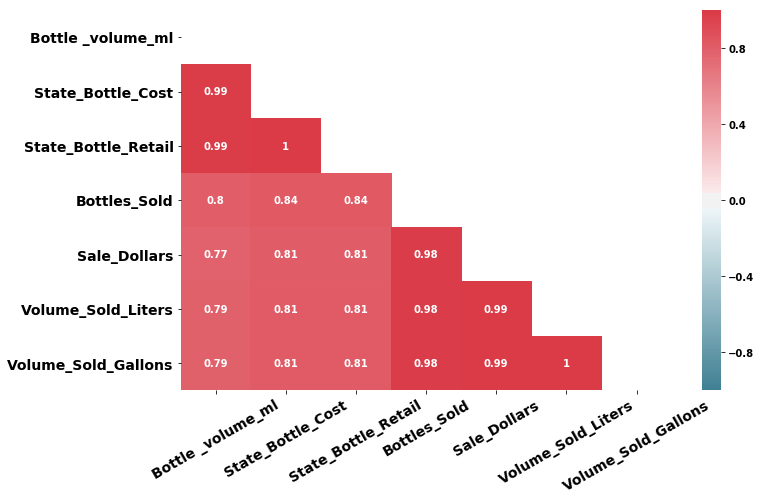

In [31]:
#Heatmap based on store location
correlation_heat_map(store_location_2018)

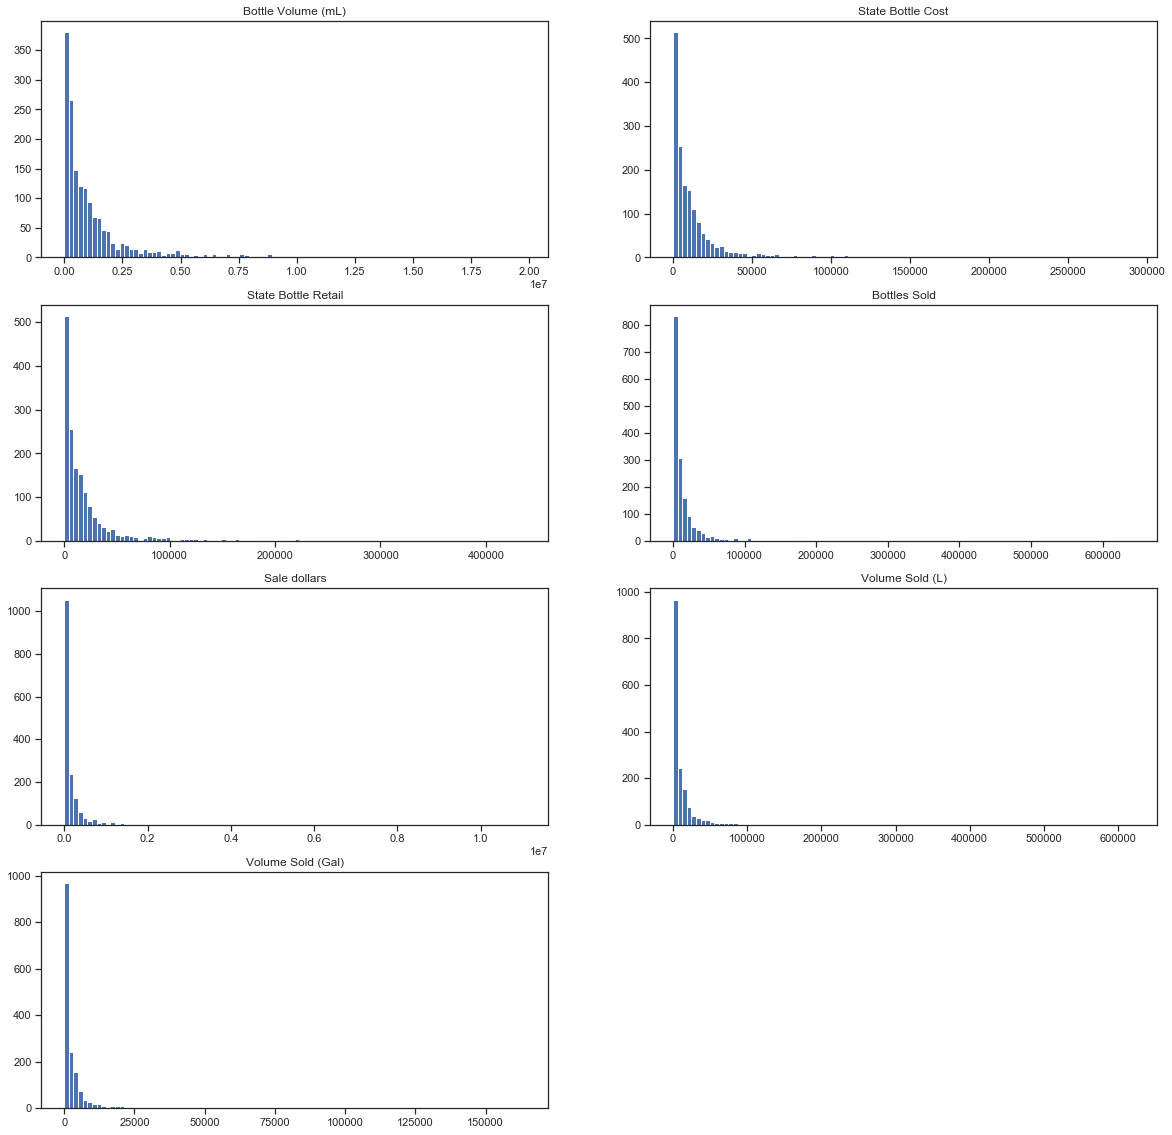

In [32]:
#How the store perform

sns.set(style = 'ticks')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(421)
_ = plt.hist(x=store_location_2018['Bottle _volume_ml'],bins=100)
_ = plt.title('Bottle Volume (mL)')

ax = fig.add_subplot(422)
_ = plt.hist(x=store_location_2018['State_Bottle_Cost'],bins=100)
_ = plt.title('State Bottle Cost')

ax = fig.add_subplot(423)
_ = plt.hist(x=store_location_2018['State_Bottle_Retail'],bins=100)
_ = plt.title('State Bottle Retail')

ax = fig.add_subplot(424)
_ = plt.hist(x=store_location_2018['Bottles_Sold'],bins=100)
_ = plt.title('Bottles Sold')

ax = fig.add_subplot(425)
_ = plt.hist(x=store_location_2018['Sale_Dollars'],bins=100)
_ = plt.title('Sale dollars')

ax = fig.add_subplot(426)
_ = plt.hist(x=store_location_2018['Volume_Sold_Liters'],bins=100)
_ = plt.title('Volume Sold (L)')

ax = fig.add_subplot(427)
_ = plt.hist(x=store_location_2018['Volume_Sold_Gallons'],bins=100)
_ = plt.title('Volume Sold (Gal)')

plt.show()

In [33]:
# Let's see how it does compare with the month we are looking for which is football season
footbal_season = monthly_2018[monthly_2018['Date'].isin(['August','September','October', 'November'])]
footbal_season = pd.merge(footbal_season,sales_2018.reset_index(),on='Store_Number')
footbal_season.rename(columns={'Sale_Dollars_x':'month_sales',
                       'Sale_Dollars_y':'annual_sales'},inplace=True)
footbal_season.head()

,Date,Store_Number,Bottle _volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,month_sales,Volume_Sold_Liters,Volume_Sold_Gallons,annual_sales
0,August,2106,409025,5022.83,7535.24,9582,132690.83,8997.30,2375.34,1337244.94
1,November,2106,357975,4782.93,7175.30,7722,118259.02,7162.80,1890.76,1337244.94
2,October,2106,321000,3705.00,5558.29,7719,102804.27,7327.75,1934.64,1337244.94
3,September,2106,338725,4039.90,6060.65,6911,97067.54,6451.87,1703.15,1337244.94
4,August,2113,88500,1007.64,1511.69,332,4272.97,321.23,84.39,80578.24


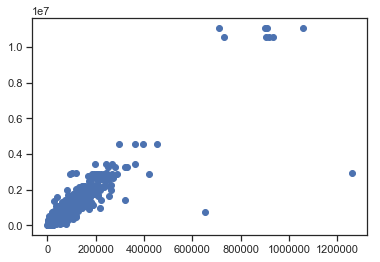

In [34]:
#lET'S PLOT AND SEE HOW THINGS ARE GOING
plt.scatter(footbal_season['month_sales'],footbal_season['annual_sales'])

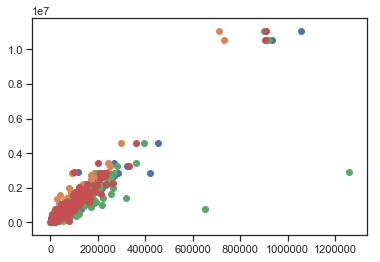

In [35]:
#PLOTING THE FOOTBALL SEASON WITH THE ANUAL SALES

plt.scatter(footbal_season[footbal_season['Date']=='August']['month_sales'],
            footbal_season[footbal_season['Date']=='August']['annual_sales'])

plt.scatter(footbal_season[footbal_season['Date']=='September']['month_sales'],
            footbal_season[footbal_season['Date']=='September']['annual_sales'])

plt.scatter(footbal_season[footbal_season['Date']=='October']['month_sales'],
            footbal_season[footbal_season['Date']=='October']['annual_sales'])

plt.scatter(footbal_season[footbal_season['Date']=='November']['month_sales'],
            footbal_season[footbal_season['Date']=='November']['annual_sales'])


# Let's start designing our model

In [36]:
def r2_adj(y_true,y_preds,y_mean,p,n):
    sumsqerr = np.sum((y_true - y_preds)**2)
    sumtotsq = np.sum((y_true - y_mean)**2)
    
    numerator = (1 / (n-p-1)) * sumsqerr
    denominator = (1 / (n-1)) * sumtotsq
    
    return 1 - (numerator / denominator)

# creating a path for 2018 model

In [37]:
#create independent variable matrix
selling_2018 = sales_data[['Store_Number',"('Sale_Dollars', 'August')", 
                       "('Sale_Dollars', 'September')","('Sale_Dollars', 'October')","('Sale_Dollars', 'November')"]].copy()

#create dependent variable from annual sales (again)
sales_2018 = sales_data[['Store_Number','Sale_Dollars']]

In [38]:
#set index as store ID in both matrices
selling_2018.set_index('Store_Number',inplace=True)
sales_2018.set_index('Store_Number',inplace=True)

# OUR FIRST MODEL

In [39]:
#2018
#Create quarterly sales
sales2018_Q2 = selling_2018.copy()

sales2018_Q2['Q1'] = sales2018_Q2["('Sale_Dollars', 'August')"] + sales2018_Q2["('Sale_Dollars', 'September')"] + sales2018_Q2["('Sale_Dollars', 'October')"] + sales2018_Q2 ["('Sale_Dollars', 'November')"]

sales2018_Q2.drop(["('Sale_Dollars', 'August')","('Sale_Dollars', 'September')","('Sale_Dollars', 'October')","('Sale_Dollars', 'November')"],axis=1,inplace=True)

sales2018_Q2.head()

,Q1
Store_Number,
2106,450821.66
2113,23310.63
2130,398944.07
2178,110698.49
2190,548692.83


In [40]:
sales2018_Q2.fillna(0, inplace =True)

In [41]:
#Let's perform a linear regression 

In [42]:
hope = linear_model.LinearRegression()
hope_scores_kf = cross_val_score(hope,sales2018_Q2,sales_2018,cv=32)

print(hope_scores_kf)
print(np.mean(hope_scores_kf))
print(np.std(hope_scores_kf))


[ 0.98192745  0.9509421   0.95836617  0.99197131  0.87412295  0.98740508
  0.9891374   0.93079814  0.98520182  0.9891842   0.72985082  0.94668708
  0.92660363  0.90174162  0.94309416  0.93845165  0.92875991  0.99613345
  0.92315405  0.98802984  0.99671766  0.98811295  0.95990386  0.98029822
  0.95514776  0.9873173   0.92135115  0.97759122  0.9100697   0.60679861
 -0.7914294   0.05534155]
0.8565244818430318
0.342389681259882


In [43]:
# Now let's predict and see how we are doing
prediction_2018 = cross_val_predict(hope,sales2018_Q2,sales_2018,cv=32)
round_2018 = metrics.r2_score(sales_2018,prediction_2018)
round_2018

0.9796674754650874

In [44]:
# trying to figure out where the line intercept
atl = linear_model.LinearRegression()
atl.fit(sales2018_Q2,sales_2018)

print(atl.coef_)
print(atl.intercept_)

[[2.87757036]]
[2942.94940741]


In [45]:
prediction_2018 = atl.predict(sales2018_Q2)
prediction_2018 = atl.score(sales2018_Q2,sales_2018)
print(prediction_2018)

0.9803221597479184


In [46]:
r2_adj(sales_2018,prediction_2018,np.mean(sales_2018),1,len(sales_2018))

Sale_Dollars   -0.147351
dtype: float64

# model 2 based on the month only

In [47]:
# read the table
selling_2018.head()

,"('Sale_Dollars', 'August')","('Sale_Dollars', 'September')","('Sale_Dollars', 'October')","('Sale_Dollars', 'November')"
Store_Number,,,,
2106,132690.83,97067.54,102804.27,118259.02
2113,4272.97,6570.82,6992.27,5474.57
2130,118929.04,88363.56,92661.06,98990.41
2178,26945.75,17196.98,33369.91,33185.85
2190,126270.45,131375.28,141283.93,149763.17


In [48]:
selling_2018.fillna(0, inplace =True)

In [49]:
# coonducting a regression based on the individual sales per month
monthly = linear_model.LinearRegression()
monthlyscores_kf = cross_val_score(monthly,selling_2018,sales_2018,cv=32)

print(monthlyscores_kf)
print(np.mean(monthlyscores_kf))
print(np.std(monthlyscores_kf))

[ 0.99075992  0.97448109  0.99506554  0.9891893   0.97734647  0.98588098
  0.98786256  0.94365687  0.97116672  0.98248953  0.78635181  0.96161271
  0.90297075  0.94372985  0.93918668  0.96187229  0.96935063  0.99923312
  0.90897783  0.98881691  0.98948203  0.99385815  0.97760132  0.97950206
  0.94104721  0.98219951  0.96048229  0.98371744  0.85530667  0.71595649
 -0.55873332  0.91170035]
0.9028788041368463
0.26949977205994324


In [50]:
prediction2_2018 = cross_val_predict(monthly,selling_2018,sales_2018,cv=10)
rd_2018 = metrics.r2_score(sales_2018,prediction2_2018)
rd_2018

0.9927592535731223

In [51]:
monthly = linear_model.LinearRegression()
monthly.fit(selling_2018,sales_2018)

print(monthly.coef_)
print(monthly.intercept_)

[[4.75850993 3.30568212 1.09827341 2.73373592]]
[-4027.71988129]


In [52]:
pre_go2 = monthly.predict(selling_2018)
pre_go2 = monthly.score(selling_2018,sales_2018)
print(pre_go2)

0.9940626406841712


Prediction of 2016

PREDICTION IN A NUTSHELL

In [80]:
Sales_by_Date2019 = pd.DataFrame(iowa_2019.groupby(iowa_2019.Date.dt.month).aggregate(sum)['Sale_Dollars']).reset_index()
Sales_by_Date2019

,Date,Sale_Dollars
0,1,2.346540e+07
1,2,2.463023e+07
2,3,4.996546e+07
3,4,2.771600e+07
4,5,3.274595e+07
5,6,2.887703e+07


In [79]:
Sales_by_Date2019.groupby(Sales_by_Date2019.Date.dt.month).sum()

,Sale_Dollars
Date,
1,23465399.90
2,24630230.55
3,49965456.72
4,27716000.38
5,32745946.75
6,28877030.96


In [59]:
 monthly_2018["Date"] = pd.to_datetime(monthly_2018, erros= 'coerce')


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-04-01 00:00:00

In [53]:
monthly_2018.groupby(monthly_2018.Date.dt.month).sum

AttributeError: Can only use .dt accessor with datetimelike values

In [54]:
monthly_2018.dtypes

Date                    object
Store_Number             int64
Bottle _volume_ml        int64
State_Bottle_Cost      float64
State_Bottle_Retail    float64
Bottles_Sold             int64
Sale_Dollars           float64
Volume_Sold_Liters     float64
Volume_Sold_Gallons    float64
dtype: object

In [ ]:
# let's find the overall sales for each store
monthly_2018 = store_location_2018[['Sale_Dollars']]
sales_2018.head()

In [93]:
iowa_2019.head()

,index,Invoice_Item_Number,Date,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,...,Item_Number,Item_Description,Pack,Bottle _volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
3,5505505,INV-17983700005,2019-03-07,5425,Spirits Liquor,109 E 1st St. # B,Grimes,50111.0,NaN,77.0,...,100015,Fireball Bag in Box,3,3500,30.00,45.00,1,45.00,3.5,0.92
4,5505506,INV-17956400075,2019-03-06,2500,Hy-Vee Food Store #1 / Ames,3800 W Lincoln Way,Ames,50010.0,NaN,85.0,...,34456,Ketel One,12,750,12.50,18.75,4,75.00,3.0,0.79
5,5505507,INV-18453000022,2019-03-29,2445,Ruback's Food Center,504 South Highway,Oakland,51560.0,NaN,78.0,...,43037,Bacardi Gold,12,1000,9.50,14.25,2,28.50,2.0,0.52
6,5505508,INV-18030300035,2019-03-11,2528,Hy-Vee Food Store #3 / Des Moines,3221 SE 14th St,Des Moines,50315.0,NaN,77.0,...,73055,Rumchata,12,750,12.50,18.75,12,225.00,9.0,2.37
7,5505509,INV-17934800043,2019-03-05,3705,Liquor Locker,507 1st Ave #100,Rock Rapids,51246.0,NaN,60.0,...,43125,Bacardi Superior PET,12,750,8.26,12.39,2,24.78,1.5,0.39


In [94]:
iowa_2019['Date'].describe()

count                 1315308
unique                    129
top       2019-03-05 00:00:00
freq                    21834
first     2019-01-02 00:00:00
last      2019-06-28 00:00:00
Name: Date, dtype: object

In [86]:
# WE WILL CHANGE THE WAY THE DATE APPEARS AND ONLY SHOW THE DATE AS A MONTH

store_2019 = iowa_2019.groupby([iowa_2019['Date'].dt.strftime('%B'),'Store_Number'])[['Bottle _volume_ml','State_Bottle_Cost','State_Bottle_Retail', 'Bottles_Sold',
                                            'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons']].sum().reset_index()

store_2019.head()

,Date,Store_Number,Bottle _volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
0,April,2106,322275,4272.41,6409.40,6950,101199.43,6629.55,1750.13
1,April,2113,142375,1591.49,2387.59,544,7462.41,540.62,142.08
2,April,2130,267200,3101.99,4653.69,5390,84732.06,5100.30,1346.69
3,April,2178,181550,1813.61,2720.78,1553,22813.19,1634.33,430.89
4,April,2190,1081650,19612.32,29421.14,11429,167714.39,7315.83,1924.38


In [87]:
volume_sold_2019 = store_2019.pivot(index='Store_Number',columns='Date')
volume_sold_2019.columns
volume_sold_2019.head()

Bottle _volume_ml                                           \
Date                     April  February   January      June      March   
Store_Number                                                              
2106                  322275.0  299675.0  336600.0  293450.0   596000.0   
2113                  142375.0  128500.0  141375.0  129250.0   294500.0   
2130                  267200.0  264800.0  300500.0  272650.0   560550.0   
2178                  181550.0  184950.0  132775.0  221850.0   444250.0   
2190                 1081650.0  945375.0  866550.0  977200.0  2268750.0   

                        State_Bottle_Cost                                ...  \
Date                May             April  February   January      June  ...   
Store_Number                                                             ...   
2106           392200.0           4272.41   3662.43   4376.55   3706.93  ...   
2113           127750.0           1591.49   1526.54   1523.17   1417.56  ...   
2130           335125.0           3101.99   3097.95   3461.88   3382.91  ...   
2178           239325.0           1813.61   2052.91   1515.78   2580.80  ...   
2190          1128275.0          19612.32  16316.75  14136.28  16894.06  ...   

             Volume_Sold_Liters                              \
Date                    January     June     March      May   
Store_Number                                                  
2106                    6772.29  5202.85  12114.00  8703.25   
2113                     492.50   475.12    965.72   478.61   
2130                    5394.15  5497.80  10767.00  6187.55   
2178                    1178.45  1649.98   3915.40  2475.67   
2190                    5820.27  6792.85  14044.84  7000.33   

             Volume_Sold_Gallons                                               
Date                       April February  January     June    March      May  
Store_Number                                                                   
2106                     1750.13  1558.65  1787.92  1373.22  3197.90  2297.75  
2113                      142.08   103.01   129.35   124.81   253.42   125.76  
2130                     1346.69  1544.66  1424.23  1451.55  2842.86  1633.53  
2178                      430.89   402.09   310.58   434.73  1031.98   652.92  
2190                     1924.38  1639.57  1531.31  1787.33  3693.24  1840.67  

[5 rows x 42 columns]

In [88]:
monthly_stores2019 = pd.DataFrame(monthly_2019.to_records())
monthly_stores2019.head()

,Store_Number,"('Bottle _volume_ml', 'April')","('Bottle _volume_ml', 'February')","('Bottle _volume_ml', 'January')","('Bottle _volume_ml', 'June')","('Bottle _volume_ml', 'March')","('Bottle _volume_ml', 'May')","('State_Bottle_Cost', 'April')","('State_Bottle_Cost', 'February')","('State_Bottle_Cost', 'January')",...,"('Volume_Sold_Liters', 'January')","('Volume_Sold_Liters', 'June')","('Volume_Sold_Liters', 'March')","('Volume_Sold_Liters', 'May')","('Volume_Sold_Gallons', 'April')","('Volume_Sold_Gallons', 'February')","('Volume_Sold_Gallons', 'January')","('Volume_Sold_Gallons', 'June')","('Volume_Sold_Gallons', 'March')","('Volume_Sold_Gallons', 'May')"
0,2106,322275.0,299675.0,336600.0,293450.0,596000.0,392200.0,4272.41,3662.43,4376.55,...,6772.29,5202.85,12114.00,8703.25,1750.13,1558.65,1787.92,1373.22,3197.90,2297.75
1,2113,142375.0,128500.0,141375.0,129250.0,294500.0,127750.0,1591.49,1526.54,1523.17,...,492.50,475.12,965.72,478.61,142.08,103.01,129.35,124.81,253.42,125.76
2,2130,267200.0,264800.0,300500.0,272650.0,560550.0,335125.0,3101.99,3097.95,3461.88,...,5394.15,5497.80,10767.00,6187.55,1346.69,1544.66,1424.23,1451.55,2842.86,1633.53
3,2178,181550.0,184950.0,132775.0,221850.0,444250.0,239325.0,1813.61,2052.91,1515.78,...,1178.45,1649.98,3915.40,2475.67,430.89,402.09,310.58,434.73,1031.98,652.92
4,2190,1081650.0,945375.0,866550.0,977200.0,2268750.0,1128275.0,19612.32,16316.75,14136.28,...,5820.27,6792.85,14044.84,7000.33,1924.38,1639.57,1531.31,1787.33,3693.24,1840.67


In [89]:
#  let's remove the unwanted columns
iowa_sales_2019 = monthly_stores2019[['Store_Number',"('Sale_Dollars', 'January')", "('Sale_Dollars', 'February')",
       "('Sale_Dollars', 'March')", "('Sale_Dollars', 'April')",
       "('Sale_Dollars', 'May')", "('Sale_Dollars', 'June')"]]
iowa_sales_2019.head()

,Store_Number,"('Sale_Dollars', 'January')","('Sale_Dollars', 'February')","('Sale_Dollars', 'March')","('Sale_Dollars', 'April')","('Sale_Dollars', 'May')","('Sale_Dollars', 'June')"
0,2106,107404.29,90854.48,191054.66,101199.43,128709.81,87770.39
1,2113,6368.20,5959.38,14698.74,7462.41,6337.03,6401.89
2,2130,91238.54,101005.92,178849.64,84732.06,105052.14,95946.36
3,2178,16490.89,22815.88,53787.28,22813.19,35841.23,24542.36
4,2190,120237.58,146907.15,323228.62,167714.39,166749.92,159756.95


In [90]:
iowa_sales_2019.columns

Index(['Store_Number', '('Sale_Dollars', 'January')',
       '('Sale_Dollars', 'February')', '('Sale_Dollars', 'March')',
       '('Sale_Dollars', 'April')', '('Sale_Dollars', 'May')',
       '('Sale_Dollars', 'June')'],
      dtype='object')

In [1]:
# let's find the overall sales for each store
sales_2019_iowa = store_2019[['Sale_Dollars']]
sales_2019_iowa.head(10)

NameError: name 'store_2019' is not defined